# Going to Mars
## Given:
An interplanitary mission where a spacecraft is orbiting Mars: $a = 6 * R_{Mars}$, $\Omega = 45^o$, $e = 0.5$, $\omega = 60^o$, $i = 30^o$, $\theta^* = 120^o$.
Then a manuever takes plaves where the the $\Delta \bar{v} = 0.25 \hat{x} - 0.4 \hat{y} + 0.3 \hat{z} \text{ km/s}$

## Find:
a) Transform $\Delta \bar{v}$ into $\hat{r}$, $\hat{\theta}$, and $\hat{h}$ corresponding to the orignal orbit. How out of plane is the orbit? What percentage?

b) $\Delta \bar{v}_{r \theta}$ as projection on $\Delta \bar{v}$ in orbital plane. What are the angles $\beta$, $\alpha$, and $\phi$. What is the magnitude of in plane $|\Delta \bar{v}|$. Plot a vector diagram.

c) What the location and velocity afterwards; $\bar{r}^+$ and $\bar{v}^+$.

d) New orbital parameters. The new radial unit vectors: $\hat{r}$, $\hat{\theta}$, and $\hat{h}$.

e) Plot the orbits.

In [12]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm 

In [13]:
miu = SS.loc['Mars', 'miu']

a_1 = 6 * SS.loc['Mars', 'r']
e_1 = 0.5
Omega_1 = kp.Omega.degree(45)
omega_1 = kp.omega.degree(-60)
i_1 = kp.i.degree(30)
thst_1 = kp.thst.degree(120)

delV_eci = np.array([0.25, -0.4, 0.3])

### Part a)

In [14]:
delV = kp.velocity.eci2all(delV_eci, thst_1.rad, i_1.rad, omega_1.rad, Omega_1.rad)
delV_outp = delV.rad[-1]/sum(abs(delV.rad))

print('Out of plane (km/s):', round(delV.rad[-1],4))
print('Out of plane :', round(delV_outp*100,2), '%')

v_planar = delV.rad[:2]

Out of plane (km/s): 0.4896
Out of plane : 62.01 %


### Part b)

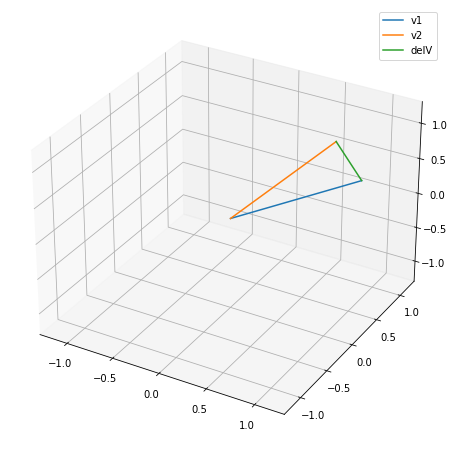

In [15]:
p_1 = kp.p_a_e(a_1, e_1)
h_1 = kp.h_miu_p(miu, p_1)

r_1 = kp.distance.keplar_r(p_1, e_1, thst_1.rad, i_1.rad, omega_1.rad, Omega_1.rad)
v_mag = kp.velocity.v_a_miu_r(a_1, miu, r_1.mag)
gamma_1 = kp.gamma.gamma_h_r_v_thst(h_1, r_1.mag, v_mag, thst_1.rad)
v_1 = kp.velocity.v_gamma(v_mag, gamma_1.rad, thst_1.rad, i_1.rad, omega_1.rad, Omega_1.rad)

v_2_rad = v_1.rad + delV.rad
v_2_eci = v_1.eci + delV.eci

alpha = kp.alpha.alpha_v1rad_delVrad(v_1.rad[:2], delV.rad[:2])
beta_out = kp.beta_out.betaout_delV(delV.rad)
phi = alpha + gamma_1 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0, v_1.rad[0]], [0, v_1.rad[1]],[0, v_1.rad[2]], label='v1')
ax.plot([0, v_2_rad[0]], [0, v_2_rad[1]],[0, v_2_rad[2]],  label='v2')
ax.plot([v_1.rad[0], v_2_rad[0]], [v_1.rad[1], v_2_rad[1]],[v_1.rad[2], v_2_rad[2]], label='delV')
ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])
ax.set_zlim([-1.25, 1.25])
ax.legend()


### Part c)

In [16]:
print('New position is same as old (km): \n', r_1.print_table())
print('\nNew velocity in the orignal orbital frame (km/s): \n', (v_1 + delV).print_table())

New position is same as old (km): 
         per      rad        eci      mag
0 -10191.00  20382.0  -3603.063  20382.0
1  17651.33      0.0  18015.313  20382.0
2      0.00      0.0   8825.665  20382.0

New velocity in the orignal orbital frame (km/s): 
      per    rad    eci    mag
0 -1.288  0.457 -1.031  1.395
1 -0.216  1.223 -0.144  1.395
2  0.490  0.490  0.928  1.395


### Part d)

In [17]:
h_2_vec = np.cross(r_1.eci, v_2_eci)
h_2 = norm(h_2_vec)
h_hat = h_2_vec/h_2
theta_hat = np.cross(h_hat, r_1.eci/r_1.mag)

p_2 = kp.p_miu_h(miu, h_2)
Eps_2 = kp.Eps_miu_r_v(miu, r_1.mag, norm(v_2_rad))
a_2 = kp.a_miu_Eps(miu, Eps_2)
e_2 = kp.e_a_p(a_2, p_2)

thst = kp.thst.thst_p_e_r(p_2, e_2, r_1.mag)

i_2 = kp.i.i_hunit(h_hat)
Omega_2 = kp.Omega.Omega_hunit(h_hat)
theta_2 = kp.theta.theta_thetaunit_runit(theta_hat, r_1.eci/r_1.mag)
omega_2 = kp.omega.omega_thst_theta(thst.rad, theta_2.rad)

AttributeError: type object 'theta' has no attribute 'theta_thetaunit_runit'

### Part e)

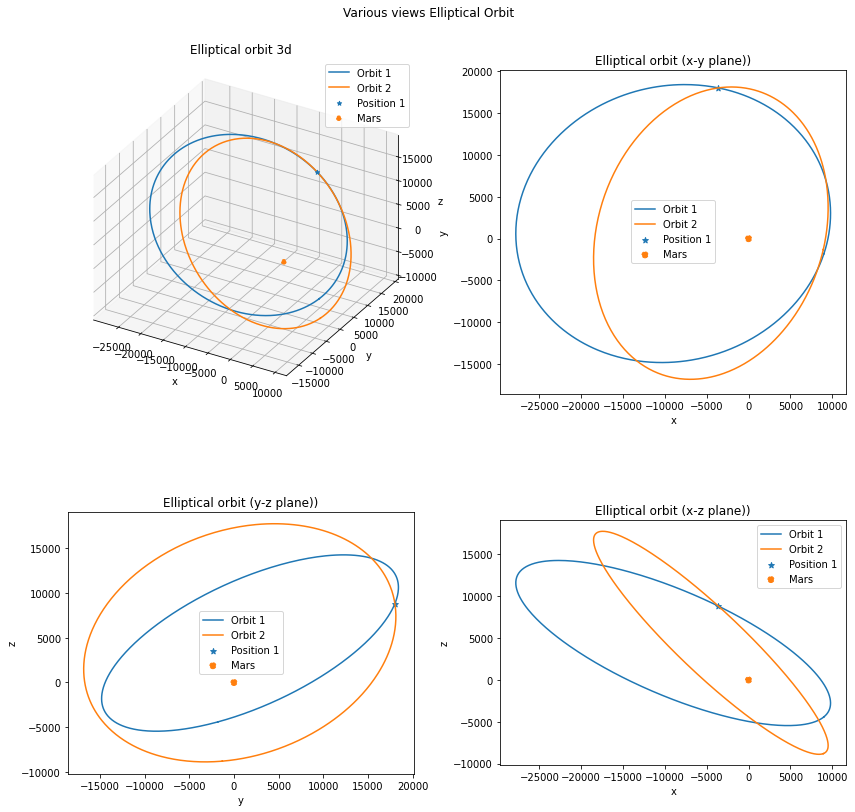

In [ ]:
thst_traj = kp.angle.degree(np.linspace(0, 360, 500))
orbit_1 = kp.distance.keplar_r(p_1, e_1, thst_traj.rad, i=i_1.rad, omega=omega_1.rad, Omega=Omega_1.rad)
orbit_2 = kp.distance.keplar_r(p_2, e_2, thst_traj.rad, i=i_2.rad, omega=omega_2.rad, Omega=Omega_2.rad)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_proj_type('ortho')
ax1.plot(orbit_1.eci[:,0], orbit_1.eci[:,1], orbit_1.eci[:,2], label='Orbit 1')
ax1.plot(orbit_2.eci[:,0], orbit_2.eci[:,1], orbit_2.eci[:,2], label='Orbit 2')
ax1.scatter(r_1.eci[0], r_1.eci[1], r_1.eci[2], label='Position 1', marker='*')
ax1.scatter(0, 0, 0, ls = '--', label='Mars')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Elliptical orbit 3d')
ax1.legend()

ax2.plot(orbit_1.eci[:,0], orbit_1.eci[:,1], label='Orbit 1')
ax2.plot(orbit_2.eci[:,0], orbit_2.eci[:,1], label='Orbit 2')
ax2.scatter(r_1.eci[0], r_1.eci[1], label='Position 1', marker='*')
ax2.scatter(0, 0, ls = '--', label='Mars')
ax2.set_aspect('equal', 'box')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Elliptical orbit (x-y plane))')
ax2.legend()

ax3.plot(orbit_1.eci[:,1], orbit_1.eci[:,2], label='Orbit 1')
ax3.plot(orbit_2.eci[:,1], orbit_2.eci[:,2], label='Orbit 2')
ax3.scatter(r_1.eci[1], r_1.eci[2], label='Position 1', marker='*')
ax3.scatter(0, 0, ls = '--', label='Mars')
ax3.set_aspect('equal', 'box')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Elliptical orbit (y-z plane))')
ax3.legend()

ax4.plot(orbit_1.eci[:,0], orbit_1.eci[:,2], label='Orbit 1')
ax4.plot(orbit_2.eci[:,0], orbit_2.eci[:,2], label='Orbit 2')
ax4.scatter(r_1.eci[0], r_1.eci[2], label='Position 1', marker='*')
ax4.scatter(0, 0, ls = '--', label='Mars')
ax4.set_aspect('equal', 'box')
ax4.set_xlabel('x')
ax4.set_ylabel('z')
ax4.set_title('Elliptical orbit (x-z plane))')
ax4.legend()

fig.suptitle('Various views Elliptical Orbit')
fig.tight_layout()
fig.subplots_adjust(top=0.95)